
Instructions
Use the attached "Adult" data set (http://arcchive.ics.uci.edu/ml/datasets/Census+Income) of census data collected to predict income for the following steps.

The basic idea is to use the apply() function (Chapter 9) to clean the data, and the split-apply-combine pattern (Chapter 10) to analyze it.

1. Similar to last week, replace '-' with spaces, where appropriate, using the apply() function.

2. Determine how to deal with missing values (if any) and use apply() to make the changes.i

3. Use apply() with Use Defined Functions (UDFs) to analyze missing values, similar to page 178 (if appropriate).

4. Use the grouping and aggregation methods in Chapter 10 to analyze data vs. income in several different ways.

FOR EXAMPLE:  education vs. income, job vs. income, job & education vs. income... etc. (This is NOT an exhaustive list. I expect you to do more).

Remember to document your steps and reasoning using markdown cells.

Deliverable: Jupyter notebook"

### loading dataset

In [1]:
#importing packages we will be unsing
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
#loading dataset and seperating ',' into columns
df = pd.read_csv('adult.data', sep=',')

In [3]:
df
#we see we do not have proper headings. We will need to shift this data down and/or add a new header row to add proper labels

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Adding new header with proper labels

In [4]:
df = pd.read_csv('adult.data', sep=',', names=['Age','Workclass','fnlwgt', 'Education','Education #', 'Marital Status','Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss','Hours Per Week','Native Country', '50k?'])

In [5]:
df.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education #',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours Per Week', 'Native Country',
       '50k?'],
      dtype='object')

In [6]:
df

,Age,Workclass,fnlwgt,Education,Education #,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country,50k?
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K



We could have used the str.replace function as shown in orange below, but for the sake of this weeks lab and using apply() function, we will not use this. 
replace '-' in 'Workclass' column

<font color ='orange'> df['Workclass'] = df['Workclass'].str.replace('-', ' ') </font>

We will use the apply() function instead..

## 1 & 2 -- Replace '-' with spaces using apply() function with lambda x: re.sub('\W', ' ', x)) & Determine how to deal with missing values and use apply() to make the changes

In [7]:
df['Workclass'] = df['Workclass'].apply(lambda x: re.sub('\W', ' ', x))
df['Education'] = df['Education'].apply(lambda x: re.sub('\W', ' ', x))
df['Marital Status'] = df['Marital Status'].apply(lambda x: re.sub('\W', ' ', x))
df['Occupation'] = df['Occupation'].apply(lambda x: re.sub('\W', ' ', x))
df['Relationship'] = df['Relationship'].apply(lambda x: re.sub('\W', ' ', x))
df['Native Country'] = df['Native Country'].apply(lambda x: re.sub('\W', ' ', x))
df 
#we now have spcaes in place of any '-' in the whoe dataset

,Age,Workclass,fnlwgt,Education,Education #,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country,50k?
0,39,State gov,77516,Bachelors,13,Never married,Adm clerical,Not in family,White,Male,2174,0,40,United States,<=50K
1,50,Self emp not inc,83311,Bachelors,13,Married civ spouse,Exec managerial,Husband,White,Male,0,0,13,United States,<=50K
2,38,Private,215646,HS grad,9,Divorced,Handlers cleaners,Not in family,White,Male,0,0,40,United States,<=50K
3,53,Private,234721,11th,7,Married civ spouse,Handlers cleaners,Husband,Black,Male,0,0,40,United States,<=50K
4,28,Private,338409,Bachelors,13,Married civ spouse,Prof specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc acdm,12,Married civ spouse,Tech support,Wife,White,Female,0,0,38,United States,<=50K
32557,40,Private,154374,HS grad,9,Married civ spouse,Machine op inspct,Husband,White,Male,0,0,40,United States,>50K
32558,58,Private,151910,HS grad,9,Widowed,Adm clerical,Unmarried,White,Female,0,0,40,United States,<=50K
32559,22,Private,201490,HS grad,9,Never married,Adm clerical,Own child,White,Male,0,0,20,United States,<=50K


In [8]:
#Here we see all our interger values and their mean
df.agg('mean')

Age                   38.581647
fnlwgt            189778.366512
Education #           10.080679
Capital Gain        1077.648844
Capital Loss          87.303830
Hours Per Week        40.437456
dtype: float64

In [9]:
#to experiment if the 0s in columns Capital Gain & Capital Loss do not skew the data. We can confirm this later on by referencing back to this table. 
# the 0s or replacing them with NaN values in Columns Capital Gain & Loss does not change the data for analysis later on. In fact, having 0s might truely represent the data better. We will not make any more changes and will go back to the dataframe with 0s.
df.replace(0,np.nan)

,Age,Workclass,fnlwgt,Education,Education #,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country,50k?
0,39,State gov,77516,Bachelors,13,Never married,Adm clerical,Not in family,White,Male,2174.0,NaN,40,United States,<=50K
1,50,Self emp not inc,83311,Bachelors,13,Married civ spouse,Exec managerial,Husband,White,Male,NaN,NaN,13,United States,<=50K
2,38,Private,215646,HS grad,9,Divorced,Handlers cleaners,Not in family,White,Male,NaN,NaN,40,United States,<=50K
3,53,Private,234721,11th,7,Married civ spouse,Handlers cleaners,Husband,Black,Male,NaN,NaN,40,United States,<=50K
4,28,Private,338409,Bachelors,13,Married civ spouse,Prof specialty,Wife,Black,Female,NaN,NaN,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc acdm,12,Married civ spouse,Tech support,Wife,White,Female,NaN,NaN,38,United States,<=50K
32557,40,Private,154374,HS grad,9,Married civ spouse,Machine op inspct,Husband,White,Male,NaN,NaN,40,United States,>50K
32558,58,Private,151910,HS grad,9,Widowed,Adm clerical,Unmarried,White,Female,NaN,NaN,40,United States,<=50K
32559,22,Private,201490,HS grad,9,Never married,Adm clerical,Own child,White,Male,NaN,NaN,20,United States,<=50K


## 3 -- Use apply() with Use Defined Functions (UDFs) to analyze missing values, similar to page 178 (if appropriate)

In [10]:
#This is the only one we are able to run on page 178 due to the type of dataset we have. After running this function, we can confirm we have no missing values in the  dataset.
null_vec = pd.isnull(df)
null_count = np.sum(null_vec)
null_count

Age               0
Workclass         0
fnlwgt            0
Education         0
Education #       0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours Per Week    0
Native Country    0
50k?              0
dtype: int64

In [11]:
df.size
#We have no missing values so out proportion would be 0/488415 or zero

488415

there is no need to use the apply()function or continue this example, as we have no missing values that are not being addressed

## 4 -- Use the grouping and aggregation methods in Chapter 10 to analyze data vs. income in several different ways.




In [12]:
#Mean by variable
#aggregate of intergers in the dataset, now that all 0's are NaN in Capital Gain and Capital Loss groups 
df.agg('mean')

Age                   38.581647
fnlwgt            189778.366512
Education #           10.080679
Capital Gain        1077.648844
Capital Loss          87.303830
Hours Per Week        40.437456
dtype: float64

In [13]:
#group by Age and income. What average age do people make over 50,000$?
df.groupby('50k?').Age.mean()

50k?
 <=50K    36.783738
 >50K     44.249841
Name: Age, dtype: float64

In [14]:
#groub by mean Age and if the make over 50K$
df.groupby('50k?').Age.describe()

,count,mean,std,min,25%,50%,75%,max
50k?,,,,,,,,
<=50K,24720.0,36.783738,14.020088,17.0,25.0,34.0,46.0,90.0
>50K,7841.0,44.249841,10.519028,19.0,36.0,44.0,51.0,90.0


In [15]:
#gruop by mean age workingclass
df.groupby('Workclass').Age.mean()

Workclass
                     40.960240
 Federal gov         42.590625
 Local gov           41.751075
 Never worked        20.571429
 Private             36.797585
 Self emp inc        46.017025
 Self emp not inc    44.969697
 State gov           39.436055
 Without pay         47.785714
Name: Age, dtype: float64

In [16]:
#Describing the working classes by age
df.groupby('Workclass').Age.describe()

,count,mean,std,min,25%,50%,75%,max
Workclass,,,,,,,,
,1836.0,40.960240,20.334587,17.0,21.00,35.0,61.0,90.0
Federal gov,960.0,42.590625,11.509171,17.0,34.00,43.0,51.0,90.0
Local gov,2093.0,41.751075,12.272856,17.0,32.00,41.0,50.0,90.0
Never worked,7.0,20.571429,4.613644,17.0,18.00,18.0,21.5,30.0
Private,22696.0,36.797585,12.827721,17.0,26.00,35.0,45.0,90.0
Self emp inc,1116.0,46.017025,12.553194,17.0,37.00,45.0,54.0,84.0
Self emp not inc,2541.0,44.969697,13.338162,17.0,35.00,44.0,54.0,90.0
State gov,1298.0,39.436055,12.431065,17.0,30.00,39.0,48.0,81.0
Without pay,14.0,47.785714,21.075610,19.0,23.75,57.0,65.0,72.0


In [17]:
#group by hours per week by age. We see some folks worked 1 hour and some 99.
df.groupby('Hours Per Week').agg('mean')

,Age,fnlwgt,Education #,Capital Gain,Capital Loss
Hours Per Week,,,,,
1,61.550000,166361.200000,9.550000,162.850000,97.200000
2,54.906250,217254.843750,10.437500,1047.031250,56.750000
3,53.564103,193058.153846,9.923077,1000.666667,94.589744
4,46.462963,157589.462963,9.425926,441.518519,30.518519
5,46.683333,170819.433333,9.883333,432.266667,87.366667
...,...,...,...,...,...
95,38.500000,149535.000000,9.500000,0.000000,0.000000
96,36.600000,301158.800000,7.600000,1537.600000,0.000000
97,30.000000,166411.500000,11.000000,0.000000,0.000000


In [18]:
#looking at metrics by Education #
df.groupby('Education #').agg('mean')

,Age,fnlwgt,Capital Gain,Capital Loss,Hours Per Week
Education #,,,,,
1,42.764706,235889.372549,898.392157,66.490196,36.647059
2,46.142857,239303.000000,125.875000,48.327381,38.255952
3,42.885886,232448.333333,176.021021,68.252252,38.897898
4,48.445820,188079.171827,233.939628,65.668731,39.366873
5,41.060311,202485.066148,342.089494,28.998054,38.044747
6,37.429796,196832.465166,404.574491,56.845659,37.052519
7,32.355745,194928.077447,215.097872,50.079149,33.925957
8,32.000000,199097.508083,284.087760,32.337182,35.780600
9,38.974479,189538.739739,576.800114,70.466622,40.575374


In [19]:
#looking at metrics by Age
df.groupby('Age').agg('mean')

,fnlwgt,Education #,Capital Gain,Capital Loss,Hours Per Week
Age,,,,,
17,185722.232911,6.648101,109.691139,41.751899,21.367089
18,193530.207273,8.152727,102.058182,44.336364,25.912727
19,204803.543539,9.096910,92.092697,43.915730,30.678371
20,198537.705179,9.345286,82.786189,33.298805,32.280212
21,200116.997222,9.434722,204.625000,51.636111,34.034722
...,...,...,...,...,...
85,126667.333333,10.333333,0.000000,0.000000,29.333333
86,149912.000000,14.000000,0.000000,0.000000,40.000000
87,90338.000000,9.000000,0.000000,0.000000,2.000000


In [20]:
#page 202 grouping into groups by gender for further analysis 

gender = df.groupby('Sex')
(gender.groups)

{' Female': Int64Index([    4,     5,     6,     8,    12,    19,    21,    24,    37,
                43,
             ...
             32540, 32541, 32543, 32544, 32545, 32546, 32549, 32556, 32558,
             32560],
            dtype='int64', length=10771),
 ' Male': Int64Index([    0,     1,     2,     3,     7,     9,    10,    11,    13,
                14,
             ...
             32547, 32548, 32550, 32551, 32552, 32553, 32554, 32555, 32557,
             32559],
            dtype='int64', length=21790)}

In [21]:
#metrics by gender means
sex = gender.mean()
sex

,Age,fnlwgt,Education #,Capital Gain,Capital Loss,Hours Per Week
Sex,,,,,,
Female,36.858230,185746.311206,10.035744,568.410547,61.187633,36.410361
Male,39.433547,191771.449013,10.102891,1329.370078,100.213309,42.428086


In [22]:
#grouping by native country 
job = df.groupby('Native Country')
(job.groups)

{'  ': Int64Index([   14,    38,    51,    61,    93,   245,   249,   297,   393,
               453,
             ...
             32213, 32232, 32254, 32307, 32413, 32449, 32469, 32492, 32510,
             32525],
            dtype='int64', length=583),
 ' Cambodia': Int64Index([  255,  1975,  4303,  4785,  5560,  7980,  8014, 11134, 11637,
             16068, 17382, 18075, 20494, 21503, 21851, 22669, 27480, 28995,
             32129],
            dtype='int64'),
 ' Canada': Int64Index([  112,   266,   593,  1051,  1314,  1379,  1688,  1938,  2284,
              2327,
             ...
             28582, 29020, 29333, 29614, 30032, 30288, 30623, 30969, 32093,
             32112],
            dtype='int64', length=121),
 ' China': Int64Index([  873,  1092,  1217,  1515,  1708,  1717,  1932,  2323,  2432,
              3627,  3647,  3714,  3987,  4598,  4972,  5435,  5786,  6065,
              6387,  7202,  8075,  8112,  8478,  8508,  9067,  9147,  9202,
              9525,  9836,  995

In [23]:
#Looking at metrics by Native Country
job1 = job.mean()
job1

,Age,fnlwgt,Education #,Capital Gain,Capital Loss,Hours Per Week
Native Country,,,,,,
,38.725557,193300.897084,10.598628,1806.518010,118.265866,41.512864
Cambodia,37.789474,193080.368421,8.789474,1027.842105,183.052632,40.894737
Canada,42.545455,179852.933884,10.652893,1504.132231,129.933884,40.404959
China,42.533333,179047.986667,11.120000,366.480000,179.520000,37.786667
Columbia,39.711864,225149.406780,9.372881,180.610169,27.152542,39.067797
Cuba,45.768421,246291.347368,9.600000,367.231579,70.042105,39.157895
Dominican Republic,37.728571,192089.557143,7.114286,1476.057143,25.171429,42.471429
Ecuador,36.642857,185858.821429,9.464286,527.607143,0.000000,39.571429
El Salvador,34.132075,254392.971698,6.839623,574.320755,31.113208,36.792453


### multi grouped by: sex by Native Country

working with multiple groups 
#page 206-208

In [24]:
#Looking at metrics by Native Country & Gender

sex_country = df.groupby(['Sex', 'Native Country'])
group_avg = sex_country.mean()
group_avg

Age         fnlwgt  Education #  Capital Gain  \
Sex     Native Country                                                          
 Female                   37.226994  177761.251534    10.404908   1668.815951   
         Cambodia         25.000000  200673.666667     7.000000   1502.666667   
         Canada           42.051282  138214.025641    10.307692   2668.282051   
         China            39.428571  181381.000000    10.333333      0.000000   
         Columbia         39.333333  230718.958333     8.750000      0.000000   
...                             ...            ...          ...           ...   
 Male    Thailand         32.571429  166502.000000    10.285714      0.000000   
         Trinadad Tobago  45.125000  169771.125000     8.000000      0.000000   
         United States    39.588003  188332.026375    10.192067   1349.930008   
         Vietnam          35.931818  168091.590909    10.181818   1005.909091   
         Yugoslavia       38.461538  225033.846154    10.769231    427.384615   

                          Capital Loss  Hours Per Week  
Sex     Native Country                                  
 Female                      98.711656       37.472393  
         Cambodia           534.000000       40.000000  
         Canada             157.410256       39.205128  
         China                0.000000       36.000000  
         Columbia            66.750000       37.791667  
...                                ...             ...  
 Male    Thailand             0.000000       47.571429  
         Trinadad Tobago    235.875000       42.250000  
         United States      101.284945       42.495279  
         Vietnam            132.931818       38.022727  
         Yugoslavia           0.000000       47.153846  

[83 rows x 6 columns]

In [25]:
#to see a better view of the top rows and if males group is working properly. It looks clean.
group_avg.head(60)

Age         fnlwgt  Education #  \
Sex     Native Country                                                       
 Female                              37.226994  177761.251534    10.404908   
         Cambodia                    25.000000  200673.666667     7.000000   
         Canada                      42.051282  138214.025641    10.307692   
         China                       39.428571  181381.000000    10.333333   
         Columbia                    39.333333  230718.958333     8.750000   
         Cuba                        44.025000  234971.825000    10.050000   
         Dominican Republic          37.971429  184291.742857     6.800000   
         Ecuador                     36.555556  174343.444444     8.444444   
         El Salvador                 34.571429  237818.857143     5.800000   
         England                     45.500000  195263.937500    10.312500   
         France                      37.916667  163574.916667    11.250000   
         Germany                     39.083333  176686.316667    10.850000   
         Greece                      42.400000  162518.200000     9.000000   
         Guatemala                   33.700000  231217.150000     5.900000   
         Haiti                       40.550000  197799.750000     9.200000   
         Holand Netherlands          32.000000   27882.000000    10.000000   
         Honduras                    36.428571  224502.857143    10.285714   
         Hong                        38.666667  168552.333333     9.333333   
         Hungary                     55.500000  189695.000000    10.666667   
         India                       32.727273  148487.727273    10.272727   
         Iran                        37.000000  164292.500000    11.500000   
         Ireland                     44.857143  136512.142857     9.571429   
         Italy                       47.190476  183600.714286     9.095238   
         Jamaica                     35.116279  207110.953488     9.465116   
         Japan                       35.600000  210004.950000    10.550000   
         Laos                        30.000000  194524.750000     8.000000   
         Mexico                      32.732877  266298.349315     6.849315   
         Nicaragua                   36.166667  267054.666667     8.000000   
         Outlying US Guam USVI etc   44.857143  198600.285714    11.142857   
         Peru                        40.142857  268323.357143     9.000000   
         Philippines                 36.698630  136712.602740    10.972603   
         Poland                      38.105263  195912.631579    10.842105   
         Portugal                    36.500000  115533.500000     6.583333   
         Puerto Rico                 42.346154  201625.576923     8.384615   
         Scotland                    45.200000  142976.800000     9.200000   
         South                       33.500000  148334.833333    10.200000   
         Taiwan                      32.200000  185063.600000    12.666667   
         Thailand                    36.454545  195407.818182    11.363636   
         Trinadad Tobago             38.545455  244115.000000     8.454545   
         United States               36.779075  184526.835055    10.123941   
         Vietnam                     30.478261  154086.652174     8.652174   
         Yugoslavia                  40.333333  176661.000000     6.333333   
 Male                                39.307143  199331.759524    10.673810   
         Cambodia                    40.187500  191656.625000     9.125000   
         Canada                      42.780488  199656.804878    10.817073   
         China                       43.740741  178140.703704    11.425926   
         Columbia                    39.971429  221330.285714     9.800000   
         Cuba                        47.036364  254523.727273     9.272727   
         Dominican Republic          37.485714  199887.371429     7.428571   
         Ecuador                     36.684211  191313.473684    

### multi grouped by: sex, relationship& marital status by Native Country

In [26]:
#Looking at metrics by Native Country, Gender, Relationship, Maritial Status

sex_country_rel_ms = df.groupby(['Sex', 'Native Country', 'Relationship', 'Marital Status'])
group_avg1 = sex_country_rel_ms.mean()
group_avg1.head(20)

Age  \
Sex     Native Country Relationship    Marital Status                      
 Female                 Not in family   Divorced               47.000000   
                                        Married spouse absent  41.500000   
                                        Never married          33.185185   
                                        Separated              48.500000   
                                        Widowed                55.750000   
                        Other relative  Divorced               66.000000   
                                        Married civ spouse     42.000000   
                                        Married spouse absent  26.000000   
                                        Never married          30.750000   
                                        Widowed                70.000000   
                        Own child       Divorced               28.000000   
                                        Married civ spouse     26.666667   
                                        Never married          22.925926   
                        Unmarried       Divorced               45.611111   
                                        Never married          31.000000   
                                        Separated              43.222222   
                                        Widowed                53.400000   
                        Wife            Married civ spouse     40.333333   
         Cambodia       Other relative  Never married          25.000000   
                        Own child       Never married          18.000000   

                                                                      fnlwgt  \
Sex     Native Country Relationship    Marital Status                          
 Female                 Not in family   Divorced               185622.625000   
                                        Married spouse absent  113915.000000   
                                        Never married          191271.703704   
                                        Separated              133555.750000   
                                        Widowed                238302.000000   
                        Other relative  Divorced               222810.000000   
                                        Married civ spouse     143582.000000   
                                        Married spouse absent  130620.000000   
                                        Never married          184601.250000   
                                        Widowed                237065.000000   
                        Own child       Divorced               149646.000000   
                                        Married civ spouse     173161.000000   
                                        Never married          165743.111111   
                        Unmarried       Divorced               171832.777778   
                                        Never married          186614.785714   
                                        Separated              180407.111111   
                                        Widowed                189475.200000   
                        Wife            Married civ spouse     173248.303030   
         Cambodia       Other relative  Never married          228608.000000   
                        Own child       Never married          261276.000000   

                                                               Education #  \
Sex     Native Country Relationship    Marital Status                        
 Female                 Not in family   Divorced                 10.625000   
                                        Married spouse absent    14.500000   
                                        Never married            10.814815   
                                        Separated                11.250000   
                                        Widowed                   7.750000   
                        Other relative  Divorced                 10.000000   
           

In [27]:
#checking the tail -- looks great. Now we can run some plots/histograms with this cleaned data
group_avg1.tail(35)

Age  \
Sex   Native Country Relationship    Marital Status                      
 Male  United States  Husband         Married AF spouse      31.444444   
                                      Married civ spouse     43.968357   
                      Not in family   Divorced               43.297599   
                                      Married civ spouse     29.714286   
                                      Married spouse absent  45.014085   
                                      Never married          32.407020   
                                      Separated              39.857778   
                                      Widowed                65.000000   
                      Other relative  Divorced               43.358974   
                                      Married civ spouse     32.860465   
                                      Married spouse absent  40.857143   
                                      Never married          27.533333   
                                      Separated              34.437500   
                                      Widowed                60.000000   
                      Own child       Divorced               38.133721   
                                      Married civ spouse     29.444444   
                                      Married spouse absent  34.375000   
                                      Never married          23.679608   
                                      Separated              31.658537   
                                      Widowed                36.500000   
                      Unmarried       Divorced               42.609589   
                                      Married spouse absent  40.500000   
                                      Never married          31.381148   
                                      Separated              42.276923   
                                      Widowed                56.800000   
                      Wife            Married civ spouse     29.000000   
       Vietnam        Husband         Married civ spouse     43.380952   
                      Not in family   Divorced               70.000000   
                                      Never married          29.500000   
                      Other relative  Never married          26.666667   
                      Own child       Never married          23.000000   
                      Unmarried       Never married          30.000000   
       Yugoslavia     Husband         Married civ spouse     41.636364   
                      Not in family   Never married          22.000000   
                      Own child       Never married          20.000000   

                                                                    fnlwgt  \
Sex   Native Country Relationship    Marital Status                          
 Male  United States  Husband         Married AF spouse      131712.222222   
                                      Married civ spouse     183892.350435   
                      Not in family   Divorced               188379.903945   
                                      Married civ spouse     233568.428571   
                                      Married spouse absent  180593.957746   
                                      Never married          198547.568742   
                                      Separated              213477.866667   
                                      Widowed                160356.957447   
                      Other relative  Divorced               183065.435897   
                                      Married civ spouse     195249.581395   
                                      Married spouse absent  206804.000000   
                                      Never married          198571.488889   
                                      Separated              227582.375000   
                                      Widowed                131903.500000   
                      Own child       Divorced               198716.709302   
  

Sex
 Female    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
 Male      [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

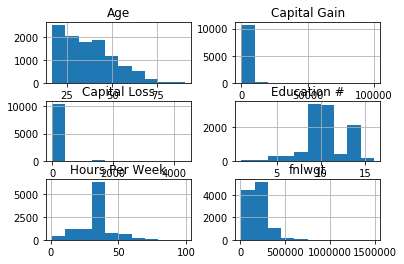

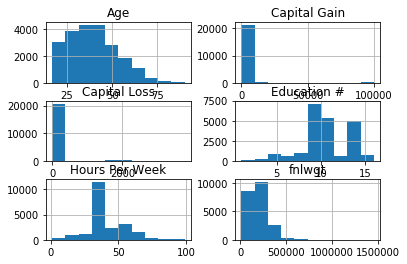

In [28]:
#Histogram by mean by gender
gender.hist()

D:\ananconda\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Native Country
                               AxesSubplot(0.125,0.125;0.775x0.755)
 Cambodia                      AxesSubplot(0.125,0.125;0.775x0.755)
 Canada                        AxesSubplot(0.125,0.125;0.775x0.755)
 China                         AxesSubplot(0.125,0.125;0.775x0.755)
 Columbia                      AxesSubplot(0.125,0.125;0.775x0.755)
 Cuba                          AxesSubplot(0.125,0.125;0.775x0.755)
 Dominican Republic            AxesSubplot(0.125,0.125;0.775x0.755)
 Ecuador                       AxesSubplot(0.125,0.125;0.775x0.755)
 El Salvador                   AxesSubplot(0.125,0.125;0.775x0.755)
 England                       AxesSubplot(0.125,0.125;0.775x0.755)
 France                        AxesSubplot(0.125,0.125;0.775x0.755)
 Germany                       AxesSubplot(0.125,0.125;0.775x0.755)
 Greece                        AxesSubplot(0.125,0.125;0.775x0.755)
 Guatemala                     AxesSubplot(0.125,0.125;0.775x0.755)
 Haiti                         Ax

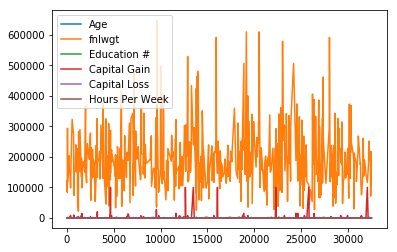

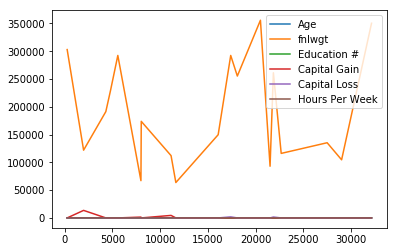

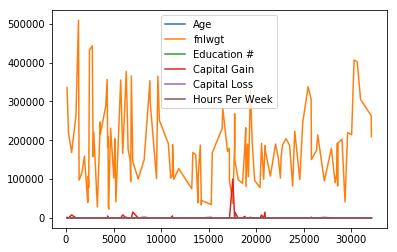

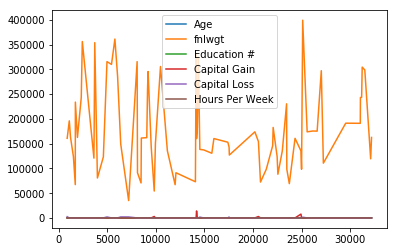

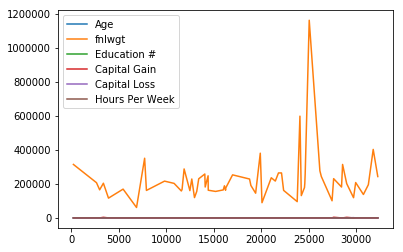

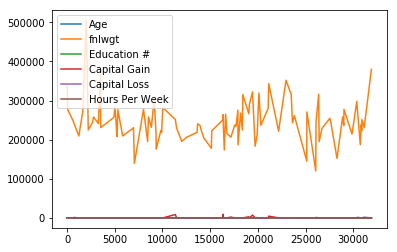

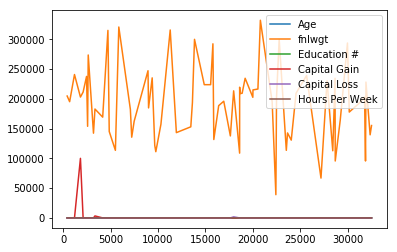

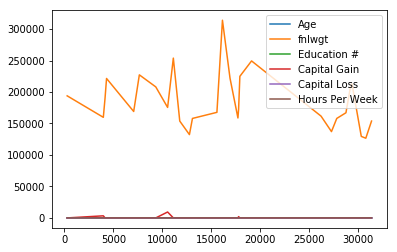

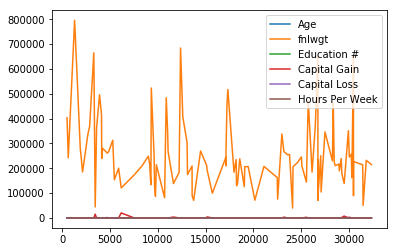

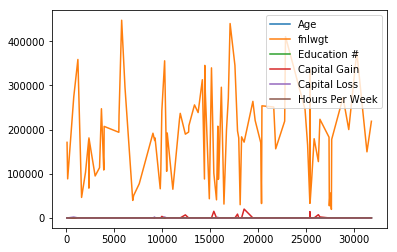

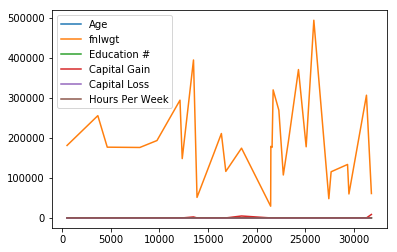

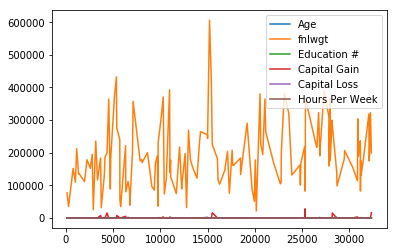

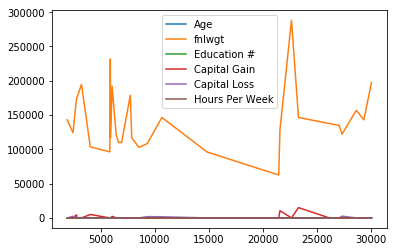

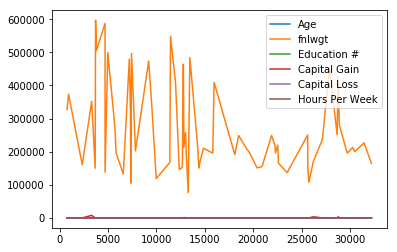

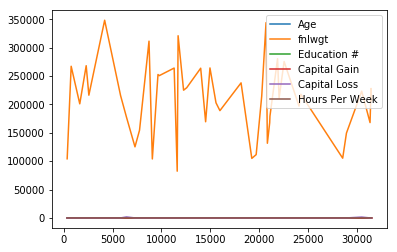

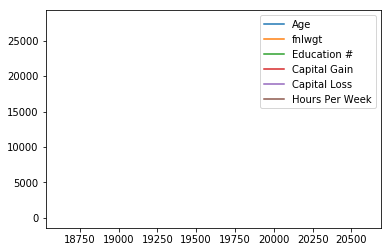

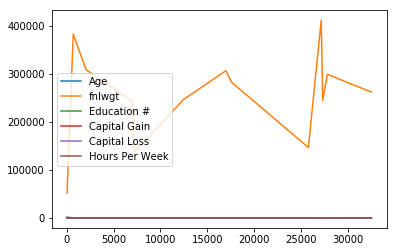

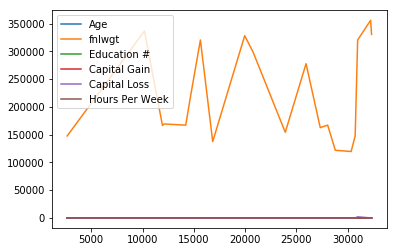

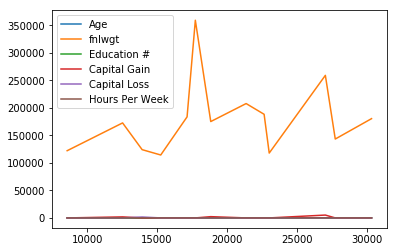

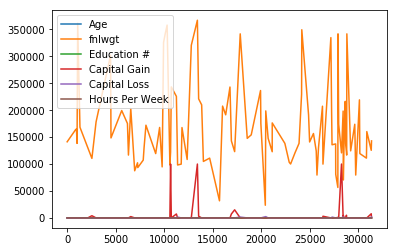

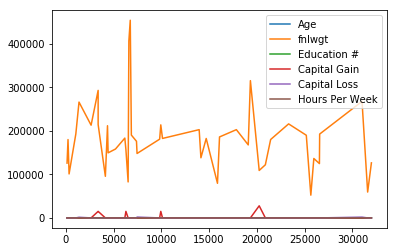

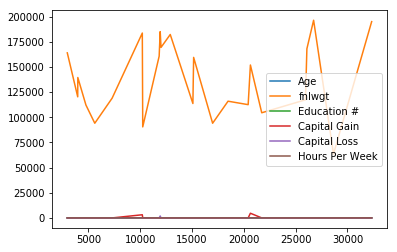

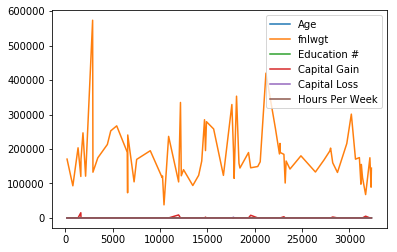

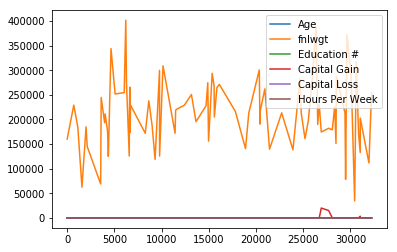

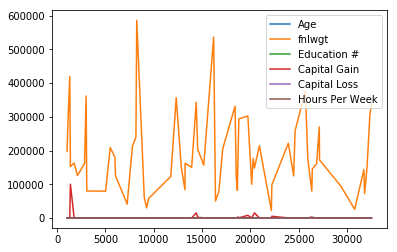

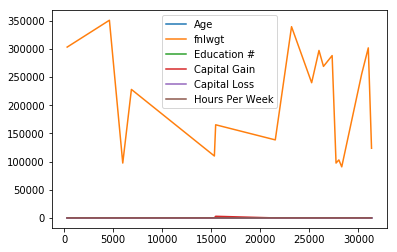

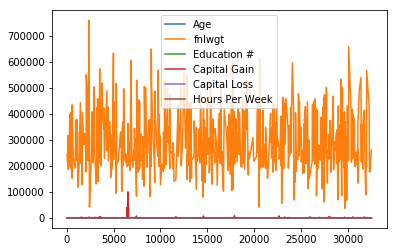

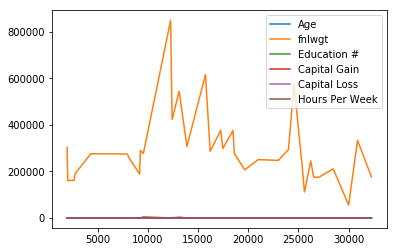

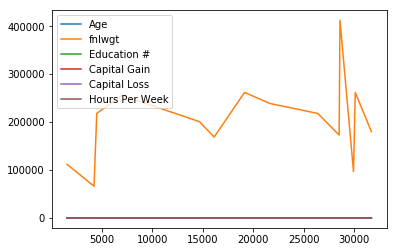

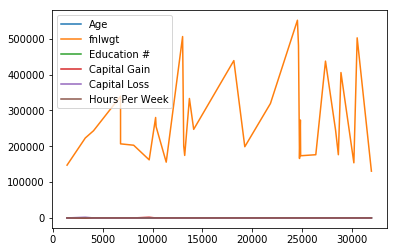

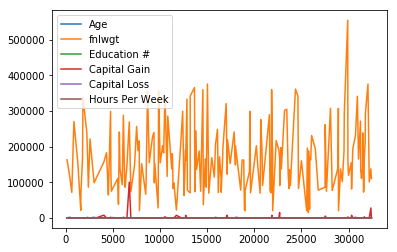

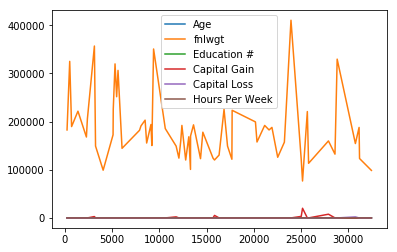

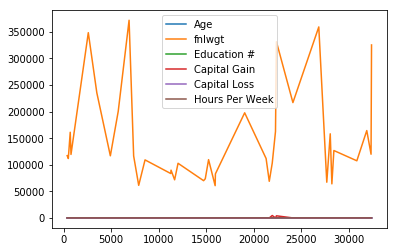

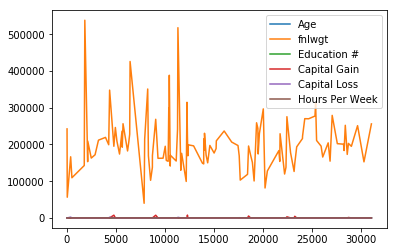

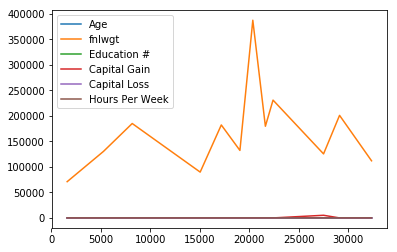

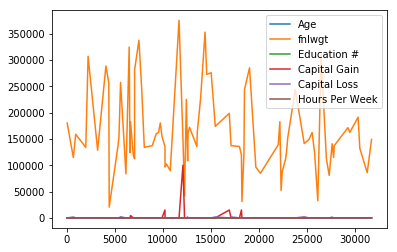

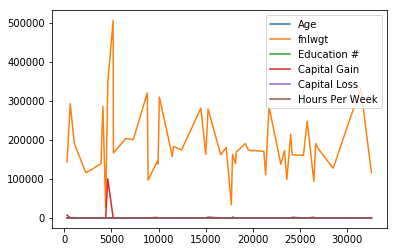

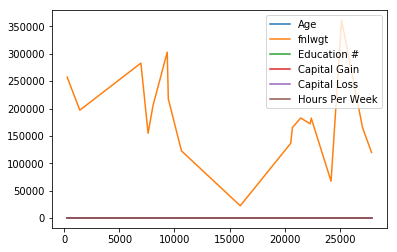

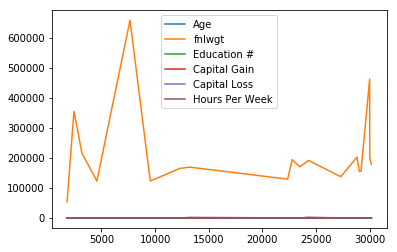

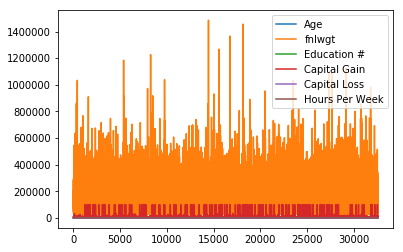

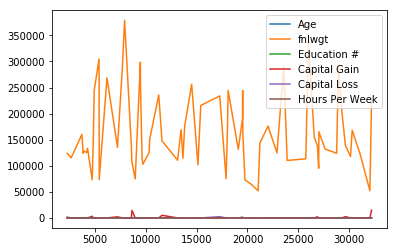

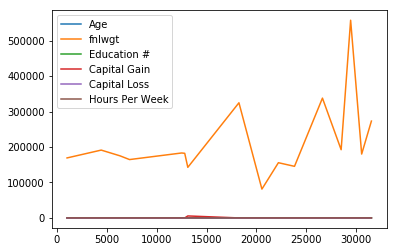

In [30]:
#Plot by Native Country 
job.plot()

## Summary

In conclusion, we were able to transform the data and clean the 'adult.data' dataset to demonstrate the use of the apply() function, how to handle missing values (if any), apply UDF analysis for missing values, and use aggregation methods from chapter 10 to analyze the data in several ways. We were succesfully able to demonstrate the apply() function with lambda, we ran different commands to look for missing values using UDF analysis - which there was nothing to make changes for this lab purposes. We were then able to have clean data to apply differnt aggregation and and grouping methods in chapter 10 to do some cool analysis on the dataset. 

### Reference:
Chen, D. Y. (2019). Python Data Analysis. Pearson Addison Wesley Data & Analytics Series. In Pandas for Everyone.